In [ ]:
# Install libraries (if needed)
!pip install scikit-learn
!pip install matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Correct version to SKIP bad lines and avoid parser error
df = pd.read_csv('/content/fake_job_postings.csv',
                 on_bad_lines='skip',  # Skip broken lines
                 encoding='latin1',    # Fix encoding
                 engine='python')      # Important: Use 'python' engine, not 'c' engine


In [ ]:
import pandas as pd

# Proper loading
df = pd.read_csv('/content/fake_job_postings.csv',
                 on_bad_lines='skip',
                 encoding='latin1',
                 engine='python')

# Show first 5 rows
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df = pd.read_csv('/content/fake_job_postings.csv', on_bad_lines='skip', encoding='latin1', engine='python')


In [ ]:
# Combine text features into one column
df['text'] = df['description'].astype(str) + " " + df['requirements'].astype(str) + " " + df['benefits'].astype(str)

# Remove rows where 'fraudulent' label is missing
df = df.dropna(subset=['fraudulent'])

# Select features and target
X = df['text']
y = df['fraudulent']  # 0 = real, 1 = fake


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)


In [ ]:
# Naive Bayes Results
print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# SVM Results
print("=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== Naive Bayes ===
Accuracy: 0.9628076062639821
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       1.00      0.27      0.42       181

    accuracy                           0.96      3576
   macro avg       0.98      0.63      0.70      3576
weighted avg       0.96      0.96      0.95      3576

=== SVM ===
Accuracy: 0.9767897091722595
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.96      0.56      0.71       181

    accuracy                           0.98      3576
   macro avg       0.97      0.78      0.85      3576
weighted avg       0.98      0.98      0.97      3576



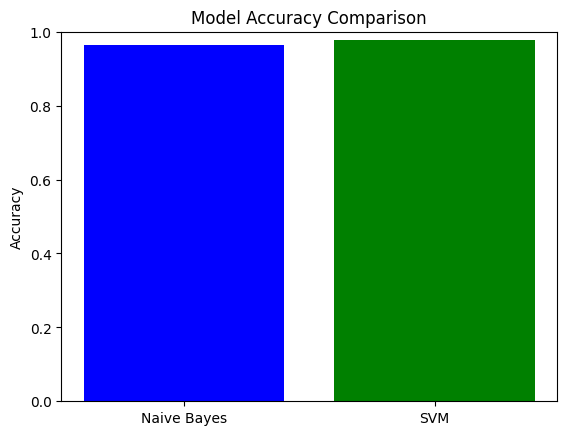

In [ ]:
# Calculate accuracies
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Plot accuracies
models = ['Naive Bayes', 'SVM']
accuracies = [acc_nb, acc_svm]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fake_job_postings.csv to fake_job_postings.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv('fake_job_postings.csv', on_bad_lines='skip')
df = df[['description', 'fraudulent']].dropna()


In [ ]:
X = df['description']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vec, y_train)
y_pred_log = log_model.predict(X_test_vec)


In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Naive Bayes Accuracy: 0.964765100671141
SVM Accuracy: 0.9773489932885906
Random Forest Accuracy: 0.9790268456375839
Logistic Regression Accuracy: 0.9670022371364653


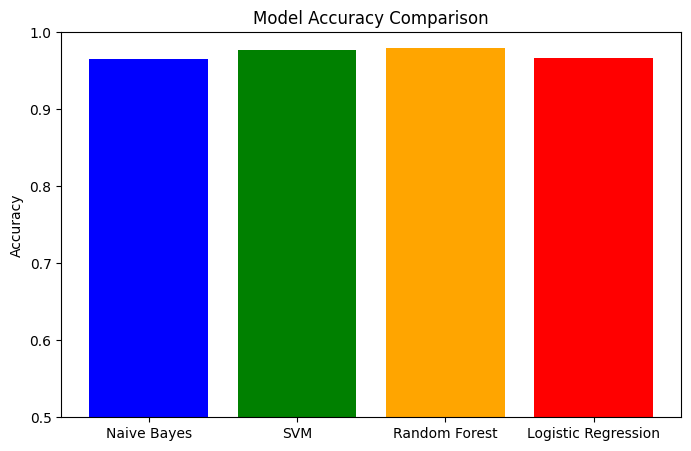

In [ ]:
models = ['Naive Bayes', 'SVM', 'Random Forest', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_log)
]

# Bar Plot
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.show()


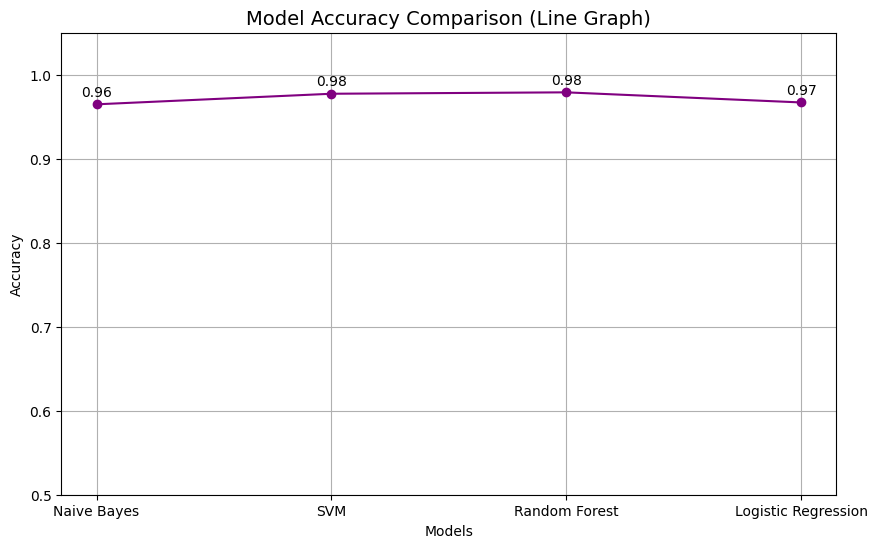

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = ['Naive Bayes', 'SVM', 'Random Forest', 'Logistic Regression']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_log)
]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='purple')

# Mark each point
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

# Labels and title
plt.title('Model Accuracy Comparison (Line Graph)', fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.05)
plt.grid(True)
plt.show()


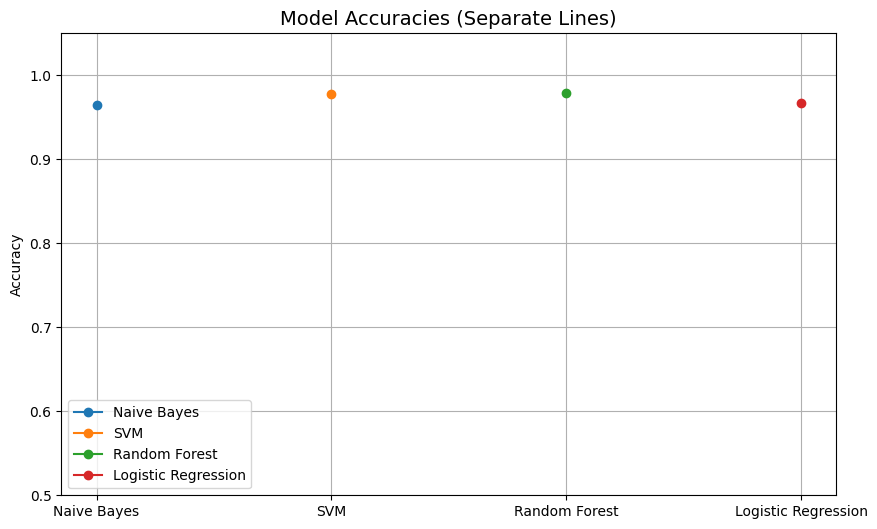

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(['Naive Bayes'], [accuracy_score(y_test, y_pred_nb)], marker='o', label='Naive Bayes')
plt.plot(['SVM'], [accuracy_score(y_test, y_pred_svm)], marker='o', label='SVM')
plt.plot(['Random Forest'], [accuracy_score(y_test, y_pred_rf)], marker='o', label='Random Forest')
plt.plot(['Logistic Regression'], [accuracy_score(y_test, y_pred_log)], marker='o', label='Logistic Regression')

plt.title('Model Accuracies (Separate Lines)', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.05)
plt.legend()
plt.grid(True)
plt.show()
